<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/ADFTestAndKPSSTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

In [2]:
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/airline-passengers.csv', header=0, index_col=0)
series.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
def visualize_time_series(data):
  plt.figure(figsize=(5,3))
  plt.plot(data, label='Time Series')
  plt.title('Visualizing Time Series')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

In [4]:
def summary_statistics(data):
  values = data.values

  parts = int(len(values)/3)
  part_1, part_2, part_3 = values[0:parts], values[parts:parts*2], values[parts*2:]

  mean_1,mean_2,mean_3 = part_1.mean(), part_2.mean(), part_3.mean()
  var_1,var_2,var_3 = part_1.var(), part_2.var(), part_3.var()

  print('mean1=%f \nmean2=%f \nmean3=%f' % (mean_1, mean_2, mean_3))
  print('varience1=%f \nvarience2=%f \nvarience3=%f' % (var_1, var_2, var_3))

In [5]:
#ADF test
def adf_test(data):
  result = adfuller(data)
  print("ADF test: ")
  print(f"ADF Statistic: {result[0]}")
  print(f"p-value: {result[1]}")
  print(f"Critical Values: {result[4]}")
  if result[1] <=0.05:
    print("Reject null hypothesis")
  else:
    print("Fail to reject null hypothesis")

In [6]:
#KPSS test
def kpss_test(data):
  result, p_value, lags, critical_values = kpss(data, regression='c')
  print("KPSS test: ")
  print(f"KPSS Statistic: {result}")
  print(f"p-value: {p_value}")
  print(f"Critical Values: {critical_values}")
  if p_value <=0.05:
    print("Reject null hypothesis")
  else:
    print("Fail to reject null hypothesis")

Performing  visual inspection....


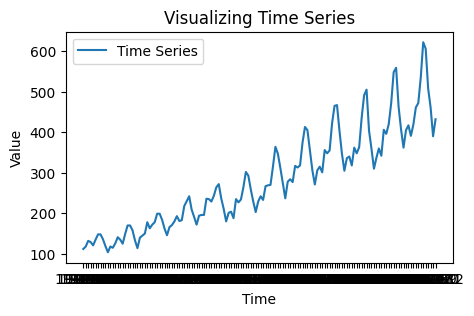

Performing summary statistics....
mean1=158.375000 
mean2=269.041667 
mean3=413.479167
varience1=1071.859375 
varience2=3041.289931 
varience3=6033.624566
Performing ADF test....
ADF test: 
ADF Statistic: 0.8153688792060528
p-value: 0.9918802434376411
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Fail to reject null hypothesis
Performing KPSS test....
KPSS test: 
KPSS Statistic: 1.6513122354165206
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject null hypothesis


In [7]:
print('Performing  visual inspection....')
visualize_time_series(series)
print('Performing summary statistics....')
summary_statistics(series)
print('Performing ADF test....')
adf_test(series)
print('Performing KPSS test....')
kpss_test(series)
